# Hyperparameter Tuning
Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning.

These hyperparameters might address model design questions such as:

What degree of polynomial features should I use for my linear model?
What should be the maximum depth allowed for my decision tree?
What should be the minimum number of samples required at a leaf node in my decision tree?
How many trees should I include in my random forest?
How many neurons should I have in my neural network layer?
How many layers should I have in my neural network?
What should I set my learning rate to for gradient descent?
I want to be absolutely clear, hyperparameters are not model parameters and they cannot be directly trained from the data. Model parameters are learned during training when we optimize a loss function using something like gradient descent
## What is grid search?
Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.


Before we dive into the deep. Lets have a review.

Steps for cross-validation:

- Dataset is split into K "folds" of equal size
- Each fold acts as the testing set 1 time, and acts as the training set K-1 times
- Average testing performance is used as the estimate of out-of-sample performance
Also known as cross-validated performance

Benefits of cross-validation:

- More reliable estimate of out-of-sample performance than train/test split
- Reduce the variance of a single trial of a train/test split
- Can be used for
    -Selecting tuning parameters
    -Choosing between models
    -Selecting features

Drawbacks of cross-validation:

- Can be computationally expensive
Especially when the data set is very large or the model is slow to train
## 2. Review of parameter tuning using cross_val_score
Goal: Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

To select the best value of k for KNN model to predict species

In [2]:
# imports 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

X matrix dimensionality: (150, 4)
Y vector dimensionality: (150,)


In [4]:
# 10-fold (cv=10) cross-validation with K=5 (n_neighbors=5) for KNN (the n_neighbors parameter)

# instantiate model
knn = KNeighborsClassifier(n_neighbors=5)

# store scores in scores object
# scoring metric used here is 'accuracy' because it's a classification problem
# cross_val_score takes care of splitting X and y into the 10 folds that's why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [5]:
# use average accuracy as an estimate of out-of-sample accuracy

# scores is a numpy array so we can use the mean method
print(scores.mean())

0.9666666666666668


In [6]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

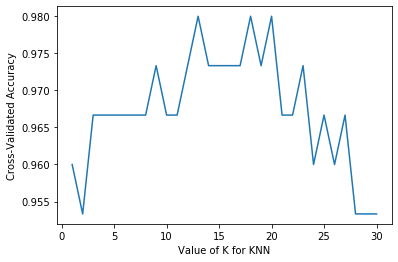

In [7]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# More efficient parameter tuning using GridSearchCV
Allows you to define a grid of parameters that will be searched using K-fold cross-validation

This is like an automated version of the "for loop" above

In [15]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [17]:
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()

In [18]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

- Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric
- In addition, there is a parameter grid to repeat the 10-fold cross validation process 30 times
Each time, the n_neighbors parameter should be given a different value from the list
- We can't give GridSearchCV just a list
- We've to specify n_neighbors should take on 1 through 30
- You can set n_jobs = -1 to run computations in parallel (if supported by your computer and OS)
This is also called parallel programming

In [19]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy')

Remember this is running 10-fold validation 30 times

KNN model is being fit and predictions are being made 30 x 10 = 300 times

In [20]:
grid.best_params_

{'n_neighbors': 13}

In [21]:
grid.best_score_

0.9800000000000001